In [130]:
import math
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from sympy.utilities.lambdify import lambdify 

In [23]:
x_real = np.linspace(-1.5, 1.5, 500)
x_imag = x_real.copy()
X_real, X_imag = np.meshgrid(x_real, x_imag)
Xa_0 = X_real + 1j*X_imag

In [24]:
x_real = np.linspace(-1.5, 1.5, 100)
x_imag = x_real.copy()
X_real, X_imag = np.meshgrid(x_real, x_imag)
Xb_0 = X_real + 1j*X_imag

In [2]:
#x_n = (-f(x_n-1) / f'(x_n-1)) + x_n-1

In [26]:
x = sp.symbols('x')
fexpr = x**3 - 1
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)

In [35]:
X,F,D = sp.symbols('X,F,D')
iterate = lambda X,F,D : (-F(X) / D(X)) + X
Xa_1 = iterate(Xa_0, f, Df)
Xb_1 = iterate(Xb_0, f, Df)

In [126]:
def basins_of_attraction(f,Df,zeros,bounds,res,iters):
  x_real = np.linspace(bounds[0],bounds[1],res)
  x_imag = np.linspace(bounds[2],bounds[3],res)
  X_real,X_imag = np.meshgrid(x_real,x_imag)
  X_0 = X_real + 1j*X_imag
  X_N = X_0.copy()
  for i in range(iters):
    X_N = iterate(X_N,f,Df)
  Y_N = []
  for i in range(len(zeros)):
    Z_N = np.full((res,res), zeros[i])
    Y_N += [abs(X_N - Z_N)]
  Y_N = np.array(Y_N)
  Y_N = Y_N.argmin(axis=0)
  plt.pcolormesh(X_real,X_imag,Y_N,cmap='brg')
  plt.show()

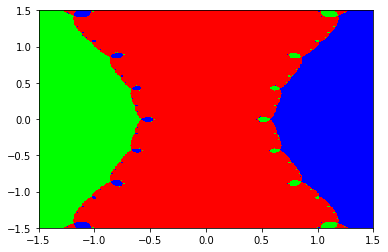

In [135]:
x = sp.symbols('x')
fexpr = x**3 - x
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
basins_of_attraction(f,Df,[1,0,-1],[-1.5,1.5,-1.5,1.5],500,50)

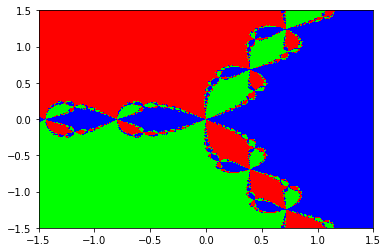

In [136]:
x = sp.symbols('x')
fexpr = x**3 - 1
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
basins_of_attraction(f,Df,[1,(-0.5 + (0.5*3**0.5)*1j),(-0.5 - (0.5*3**0.5)*1j)],[-1.5,1.5,-1.5,1.5],500,50)

In [128]:
def weird_carpets(f,Df,zeros,bounds,res,iters):
  x_real = np.linspace(bounds[0],bounds[1],res)
  x_imag = np.linspace(bounds[2],bounds[3],res)
  X_real,X_imag = np.meshgrid(x_real,x_imag)
  X_0 = X_real + 1j*X_imag
  X_N = X_0.copy()
  for i in range(iters):
    X_N = iterate(X_N,f,Df)
  Y_N = []
  for i in range(len(zeros)):
    Z_N = np.full((res,res), zeros[i])
    Y_N += [abs(X_N - Z_N)]
  Y_N = np.array(Y_N)
  Y_N = np.reshape(Y_N,(res,res,len(zeros)))
  Y_N = Y_N.argmin(axis=2)
  plt.pcolormesh(X_real,X_imag,Y_N,cmap='brg')
  plt.show()

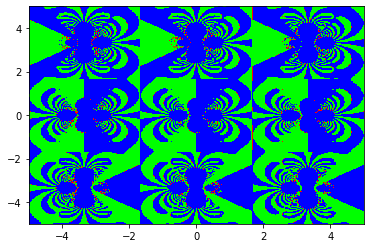

In [129]:
x = sp.symbols('x')
fexpr = x**3 - x
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
weird_carpets(f,Df,[1,0,-1],[-5,5,-5,5],500,7)

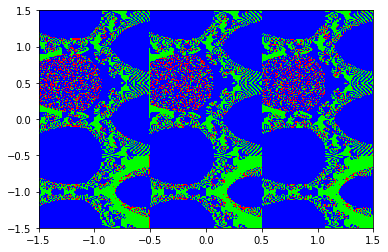

In [138]:
x = sp.symbols('x')
fexpr = x**3 - 1
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
weird_carpets(f,Df,[1,(-0.5 + (0.5*3**0.5)*1j),(-0.5 - (0.5*3**0.5)*1j)],[-1.5,1.5,-1.5,1.5],500,7)

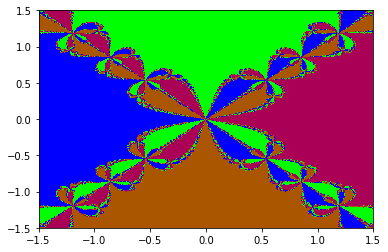

In [141]:
x = sp.symbols('x')
fexpr = x**4 - 1
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
basins_of_attraction(f,Df,[-1,1,-1j,1j],[-1.5,1.5,-1.5,1.5],500,50)

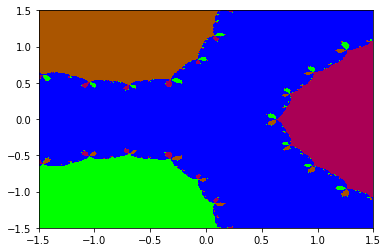

In [142]:
x = sp.symbols('x')
fexpr = x**4 - x
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
basins_of_attraction(f,Df,[0,1,(-0.5 + (0.5*3**0.5)*1j),(-0.5 - (0.5*3**0.5)*1j)],[-1.5,1.5,-1.5,1.5],500,50)

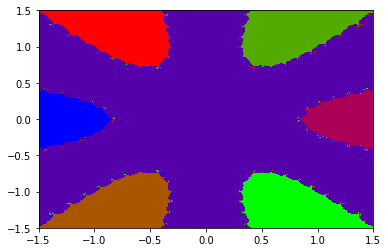

In [170]:
x = sp.symbols('x')
fexpr = x**9 - x**3
Dfexpr = sp.diff(fexpr)
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
basins_of_attraction(f,Df,[-1,0,1,(-1+(3**0.5)*1j)/2,(-1-(3**0.5)*1j)/2,(1+(3**0.5)*1j)/2,(1-(3**0.5)*1j)/2],[-1.5,1.5,-1.5,1.5],500,50)

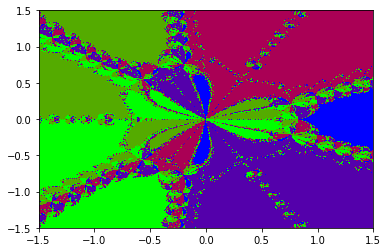

In [173]:
x = sp.symbols('x')
fexpr = x**9 - x**3 - 2**0.5
Dfexpr = sp.diff(fexpr)
zeros = [2**(1/6),(1-1j)/2**0.5,(1+1j)/2**0.5]
zeros += [(((3/2**0.5)**0.5)-1)/2**1.5 + ((((3/2**0.5)**0.5)-1)/2**1.5)*1j,(((3/2**0.5)**0.5)-1)/2**1.5 - ((((3/2**0.5)**0.5)-1)/2**1.5)*1j]
zeros += [-(((3/2**0.5)**0.5)-1)/2**1.5 + ((((3/2**0.5)**0.5)-1)/2**1.5)*1j,-(((3/2**0.5)**0.5)-1)/2**1.5 - ((((3/2**0.5)**0.5)-1)/2**1.5)*1j]
f = lambdify(x,fexpr)
Df = lambdify(x,Dfexpr)
basins_of_attraction(f,Df,zeros,[-1.5,1.5,-1.5,1.5],1000,100)